In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycaret.utils import version
version()

'3.0.0.rc8'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.11.2


In [5]:
# https://www.kaggle.com/datasets/brsdincer/star-type-classification
df = pd.read_csv('./stars.csv')
# df=df.drop(['obj_ID', 'rerun_ID'], axis=1)
df.head(25)

Temperature         L        R     A_M       Color Spectral_Class  Type
0          3068  0.002400  0.17000  16.120         Red              M     0
1          3042  0.000500  0.15420  16.600         Red              M     0
2          2600  0.000300  0.10200  18.700         Red              M     0
3          2800  0.000200  0.16000  16.650         Red              M     0
4          1939  0.000138  0.10300  20.060         Red              M     0
5          2840  0.000650  0.11000  16.980         Red              M     0
6          2637  0.000730  0.12700  17.220         Red              M     0
7          2600  0.000400  0.09600  17.400         Red              M     0
8          2650  0.000690  0.11000  17.450         Red              M     0
9          2700  0.000180  0.13000  16.050         Red              M     0
10         3600  0.002900  0.51000  10.690         Red              M     1
11         3129  0.012200  0.37610  11.790         Red              M     1
12         3134  0.000400  0.19600  13.210         Red              M     1
13         3628  0.005500  0.39300  10.480         Red              M     1
14         2650  0.000600  0.14000  11.782         Red              M     1
15         3340  0.003800  0.24000  13.070         Red              M     1
16         2799  0.001800  0.16000  14.790         Red              M     1
17         3692  0.003670  0.47000  10.800         Red              M     1
18         3192  0.003620  0.19670  13.530         Red              M     1
19         3441  0.039000  0.35100  11.180         Red              M     1
20        25000  0.056000  0.00840  10.580  Blue White              B     2
21         7740  0.000490  0.01234  14.020       White              A     2
22         7220  0.000170  0.01100  14.230       White              F     2
23         8500  0.000500  0.01000  14.500       White              A     2
24        16500  0.013000  0.01400  11.890  Blue White              B     2

In [6]:
len(df.index)

240

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


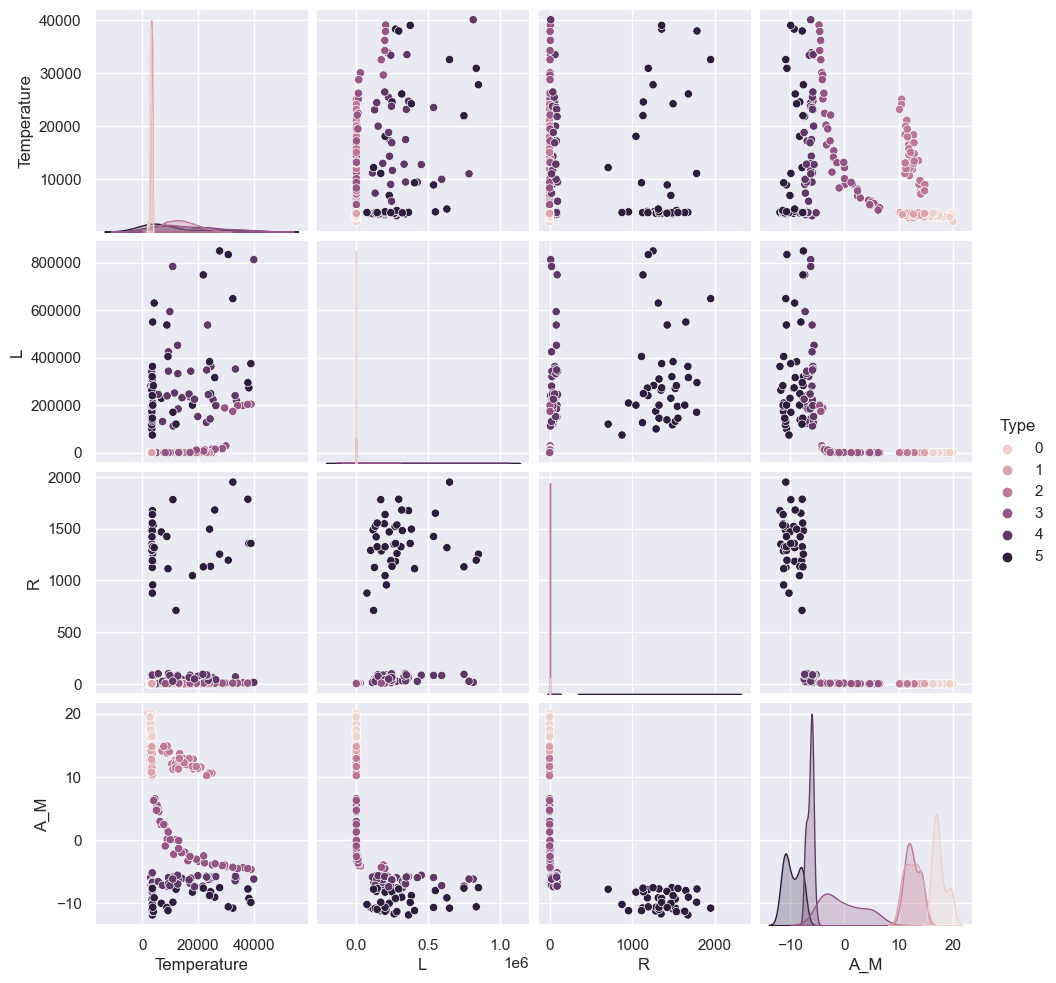

In [10]:
sns.pairplot(df, hue='Type')
plt.show()

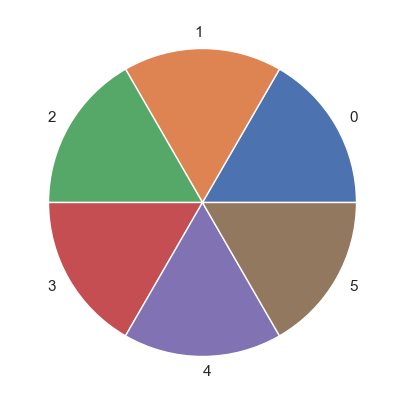

In [11]:
y =df['Type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [12]:
X = df.drop(columns=['Type', 'Color', 'Spectral_Class'])
X.head(10)

Temperature         L       R    A_M
0         3068  0.002400  0.1700  16.12
1         3042  0.000500  0.1542  16.60
2         2600  0.000300  0.1020  18.70
3         2800  0.000200  0.1600  16.65
4         1939  0.000138  0.1030  20.06
5         2840  0.000650  0.1100  16.98
6         2637  0.000730  0.1270  17.22
7         2600  0.000400  0.0960  17.40
8         2650  0.000690  0.1100  17.45
9         2700  0.000180  0.1300  16.05

In [13]:
X.describe().transpose()

count           mean            std         min          25%  \
Temperature  240.0   10497.462500    9552.425037  1939.00000  3344.250000   
L            240.0  107188.361635  179432.244940     0.00008     0.000865   
R            240.0     237.157781     517.155763     0.00840     0.102750   
A_M          240.0       4.382396      10.532512   -11.92000    -6.232500   

                   50%          75%        max  
Temperature  5776.0000   15055.5000   40000.00  
L               0.0705  198050.0000  849420.00  
R               0.7625      42.7500    1948.50  
A_M             8.3130      13.6975      20.06

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature         L         R       A_M
0    -0.779382 -0.598624 -0.459210  1.116745
1    -0.782110 -0.598624 -0.459241  1.162414
2    -0.828477 -0.598624 -0.459342  1.362213
3    -0.807496 -0.598624 -0.459229  1.167171
4    -0.897819 -0.598624 -0.459340  1.491607
5    -0.803300 -0.598624 -0.459326  1.198568
6    -0.824596 -0.598624 -0.459293  1.221402
7    -0.828477 -0.598624 -0.459353  1.238528
8    -0.823232 -0.598624 -0.459326  1.243285
9    -0.817987 -0.598624 -0.459287  1.110085

In [15]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
Temperature  240.0  1.850372e-17  1.00209 -0.897819 -0.750402 -0.495301   
L            240.0 -2.127927e-17  1.00209 -0.598624 -0.598624 -0.598623   
R            240.0 -1.850372e-17  1.00209 -0.459523 -0.459340 -0.458062   
A_M          240.0 -9.344377e-17  1.00209 -1.551051 -1.009928  0.373968   

                  75%       max  
Temperature  0.478157  3.094941  
L            0.507442  4.145201  
R           -0.376703  3.316058  
A_M          0.886263  1.491607

In [16]:
observations = list(df.index)
variables = list(df.columns)

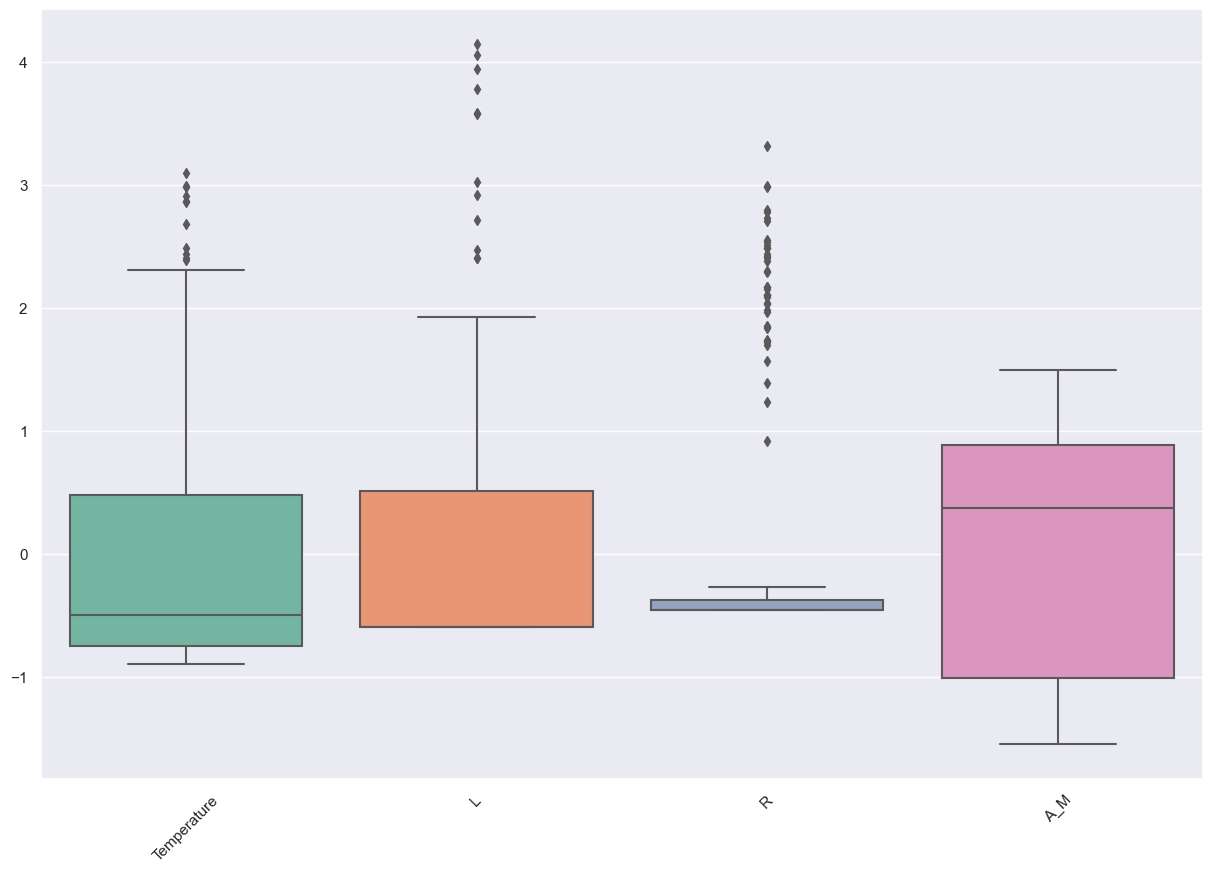

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

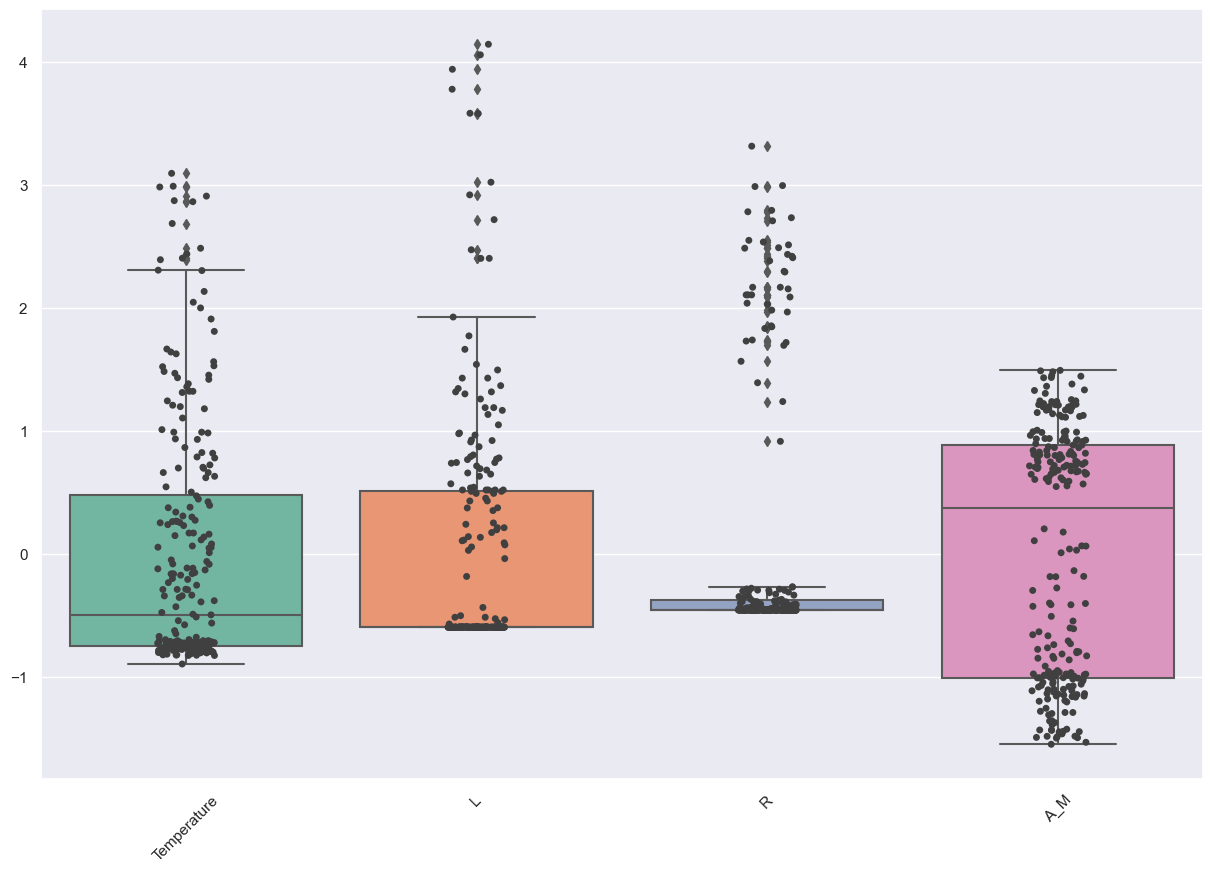

In [18]:
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.show()

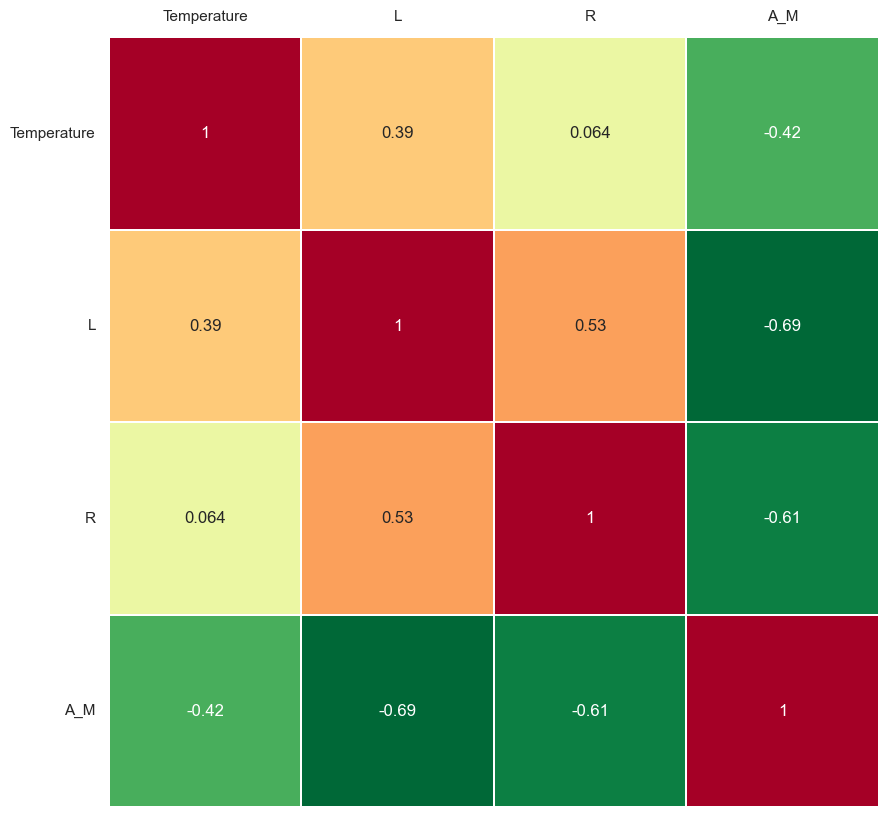

In [19]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.show()

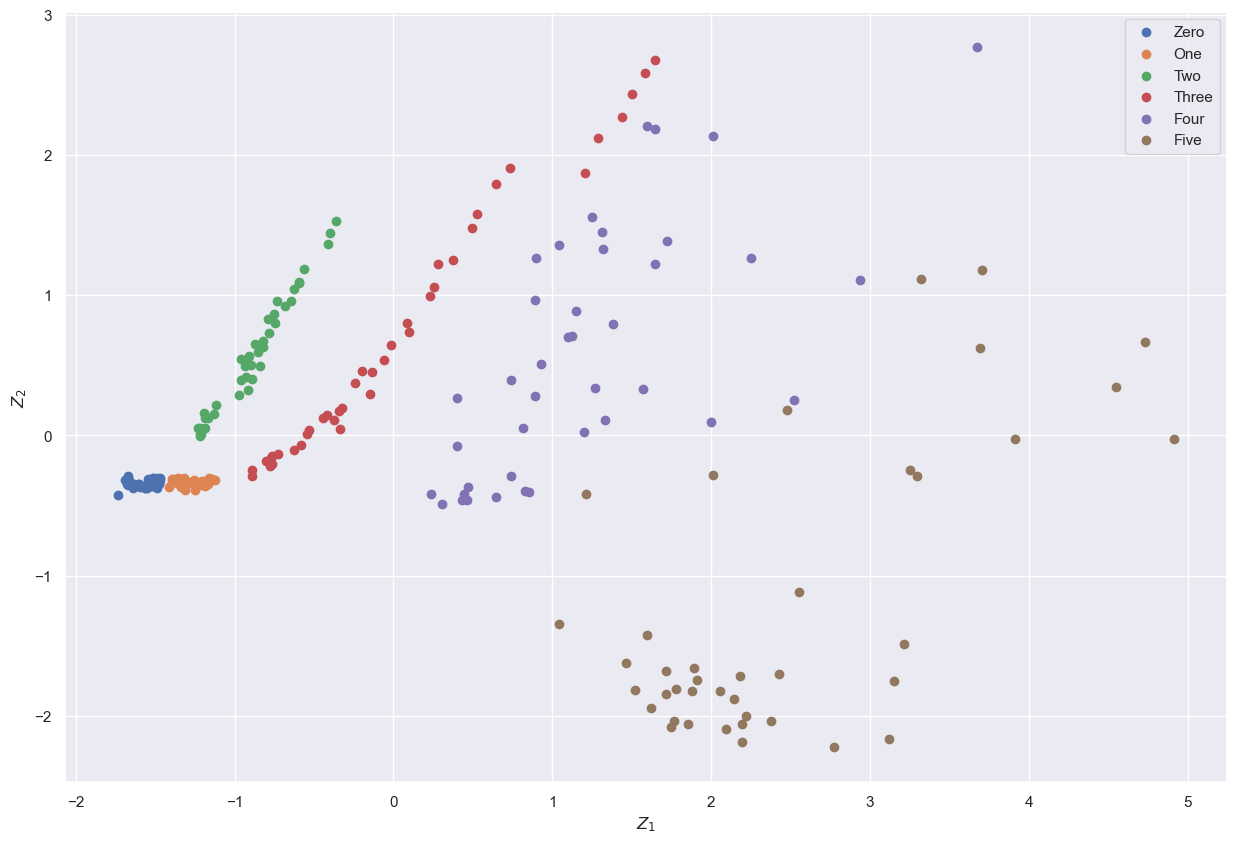

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0
idx_zero = np.where(y == 0)
idx_one = np.where(y == 1)
idx_two = np.where(y == 2)
idx_three = np.where(y == 3)
idx_four = np.where(y == 4)
idx_five = np.where(y == 5)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_zero,0], Z[idx_zero,1], label='Zero')
plt.scatter(Z[idx_one,0], Z[idx_one,1], label='One')
plt.scatter(Z[idx_two,0], Z[idx_two,1], label='Two')
plt.scatter(Z[idx_three,0], Z[idx_three,1], label='Three')
plt.scatter(Z[idx_four,0], Z[idx_four,1], label='Four')
plt.scatter(Z[idx_five,0], Z[idx_five,1], label='Five')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

In [21]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([[ 0.35018343,  0.82161262, -0.37607837,  0.24675763],
       [ 0.55933789,  0.00452564,  0.75509623,  0.34198002],
       [ 0.47477107, -0.56898115, -0.53314117,  0.40818302],
       [-0.58232734,  0.03453503,  0.06446119,  0.80965855]])

In [22]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


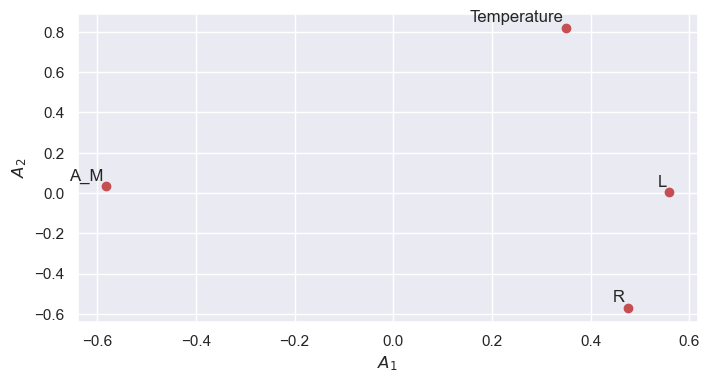

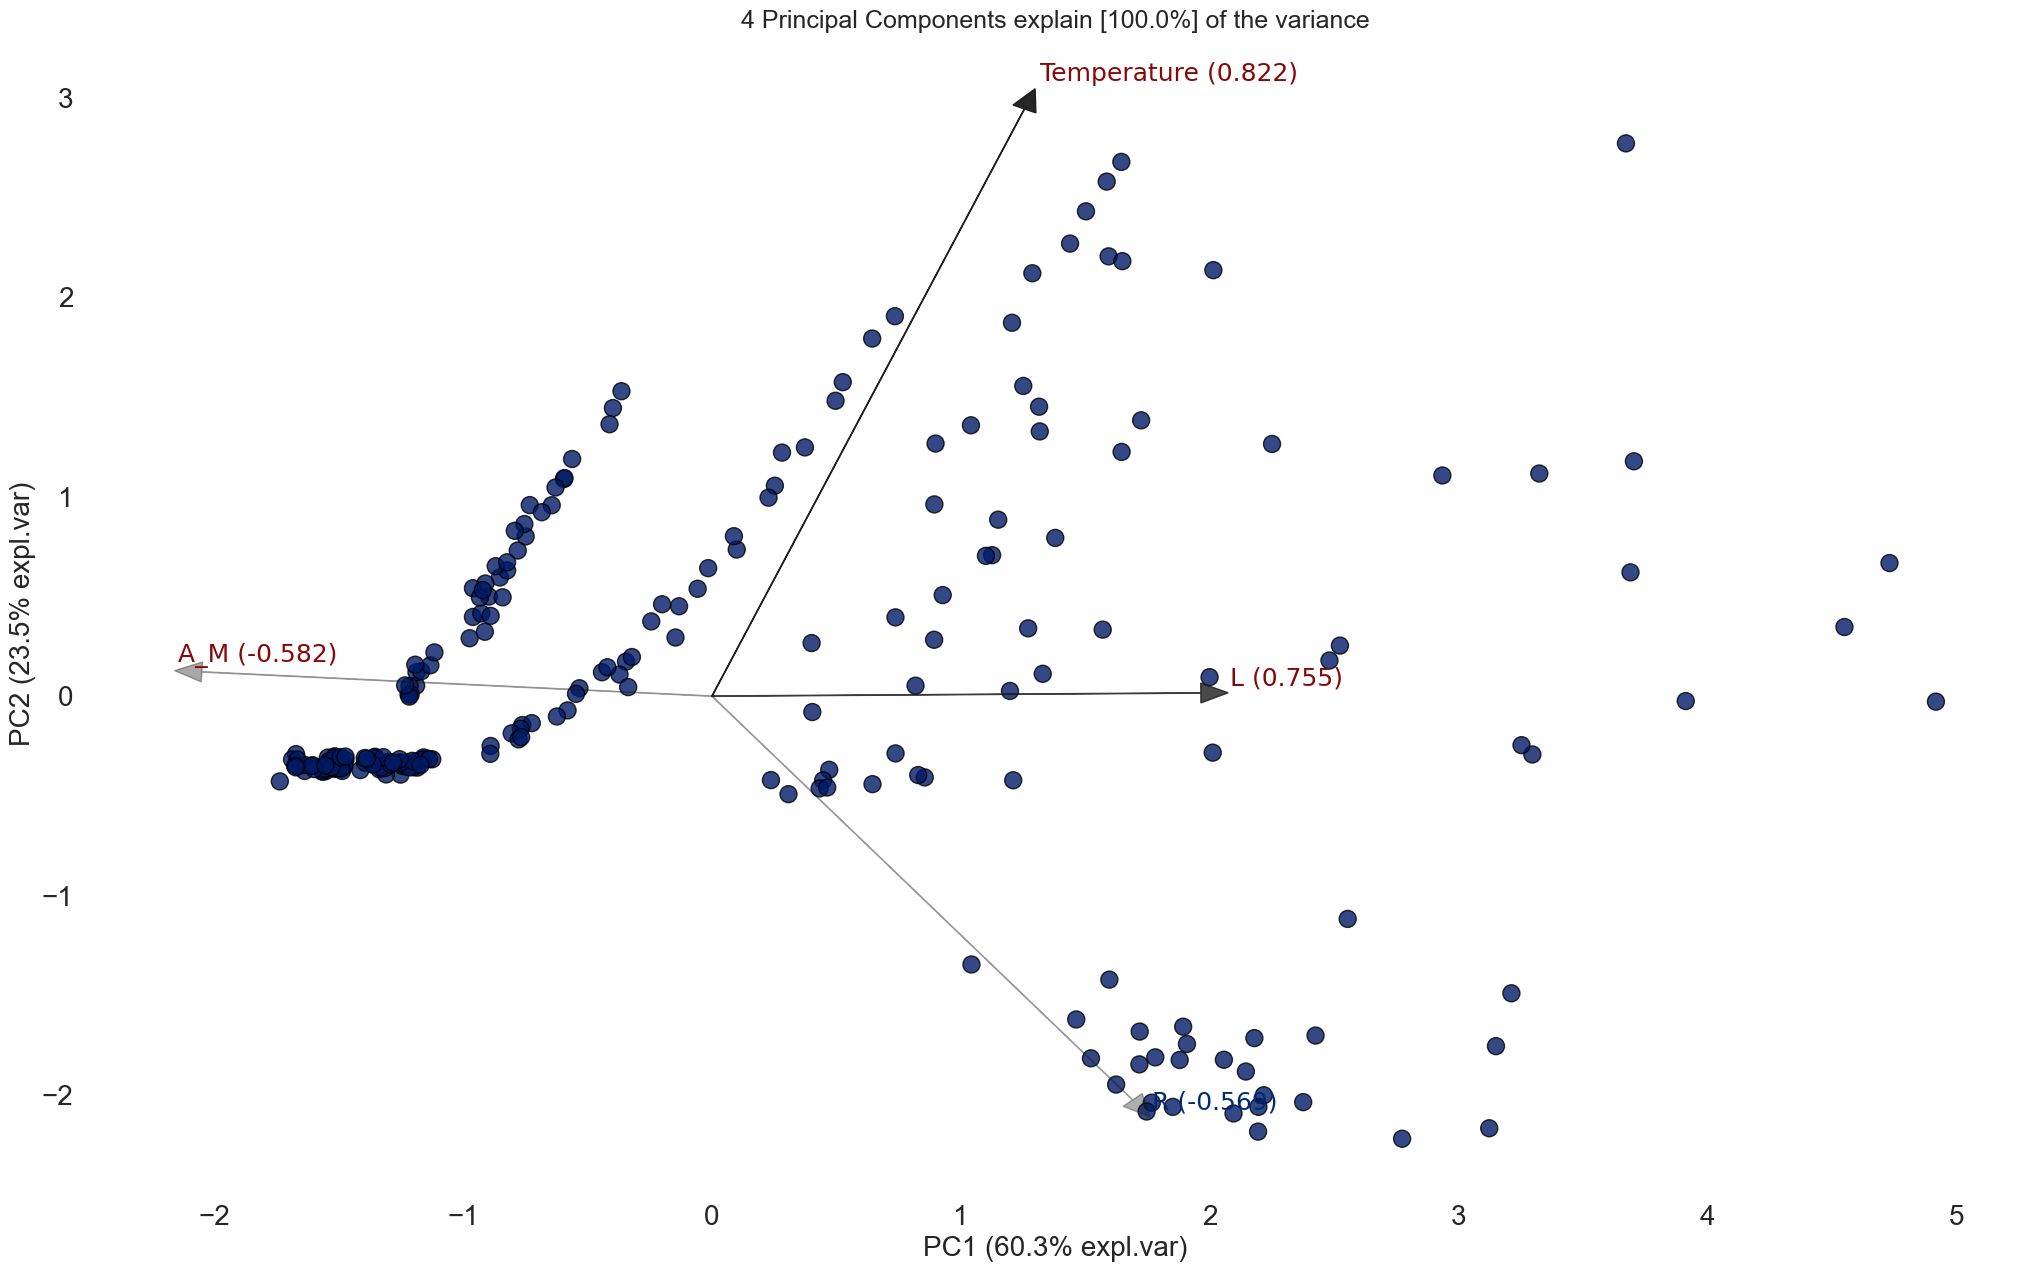

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.3% expl.var)', ylabel='PC2 (23.5% expl.var)'>)

In [23]:
model.biplot(label=False, legend=False, color_arrow='k')

In [24]:
out['PC']

PC1       PC2       PC3       PC4
0   -1.476090 -0.343211  0.157901  0.319705
1   -1.503654 -0.343857  0.161887  0.355995
2   -1.636288 -0.374996  0.192258  0.506282
3   -1.515309 -0.364557  0.171735  0.353587
4   -1.735919 -0.427500  0.226676  0.593937
..        ...       ...       ...       ...
235  3.703168  1.177682 -1.237078  1.029830
236  4.729798  0.667365  1.182107  1.515115
237  3.211102 -1.489990  0.562704  0.552412
238  2.553545 -1.117109  0.305920  0.025264
239  3.689440  0.620698 -1.960449  1.351600

[240 rows x 4 columns]

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


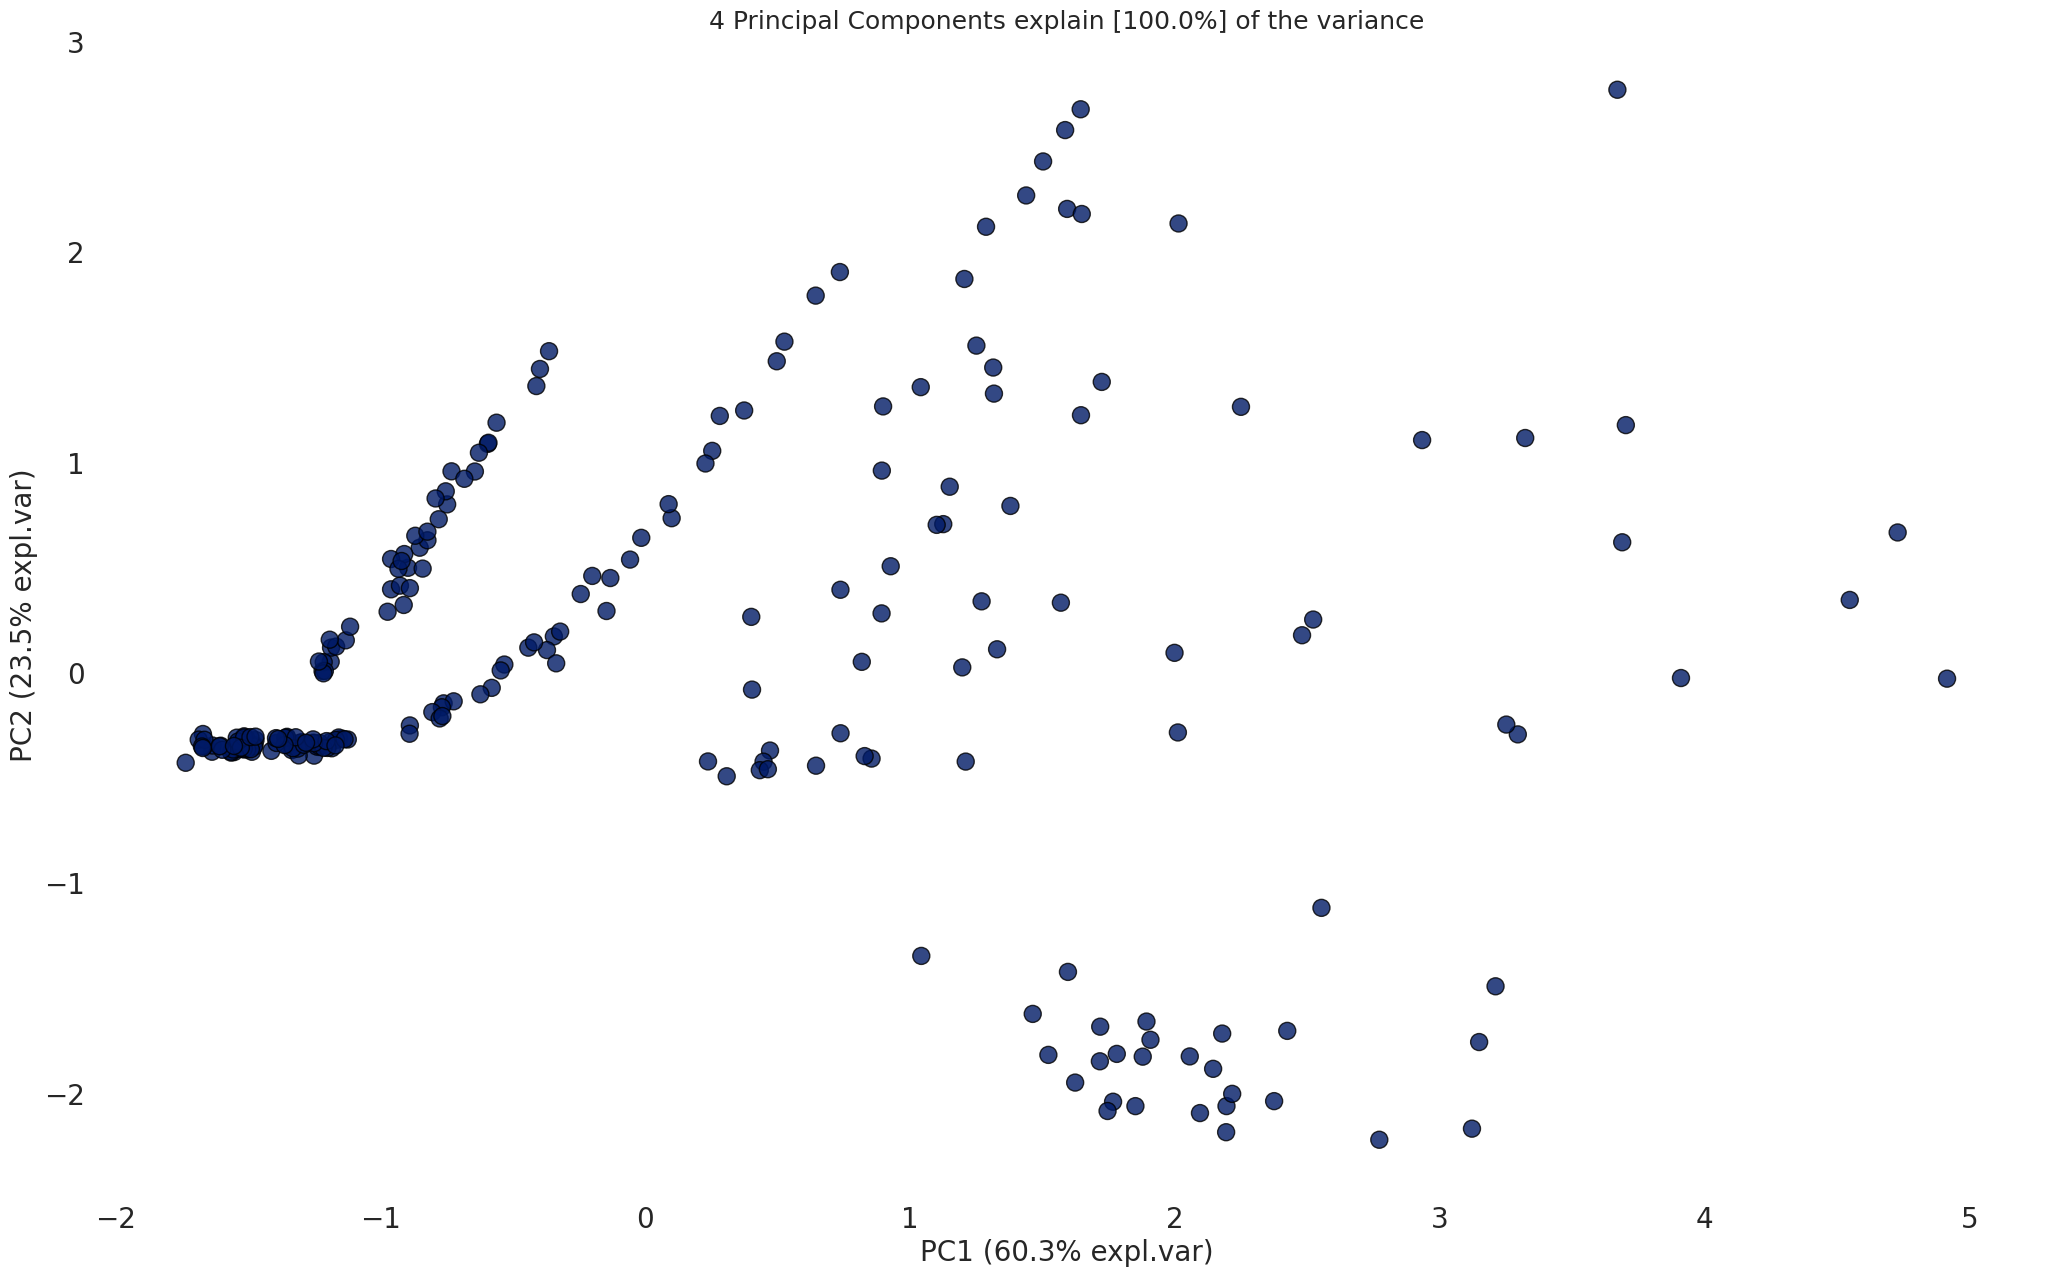

In [25]:
model.scatter(label=True, legend=False)
plt.show()

In [26]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
Temperature  0.350183  0.821613 -0.376078  0.246758
L            0.559338  0.004526  0.755096  0.341980
R            0.474771 -0.568981 -0.533141  0.408183
A_M         -0.582327  0.034535  0.064461  0.809659

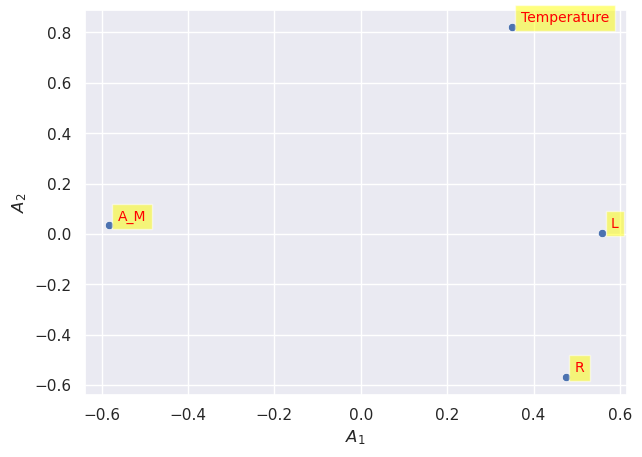

In [27]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

In [28]:
VR = out['variance_ratio']
VR

array([0.60357391, 0.23500784, 0.09329645, 0.0681218 ])

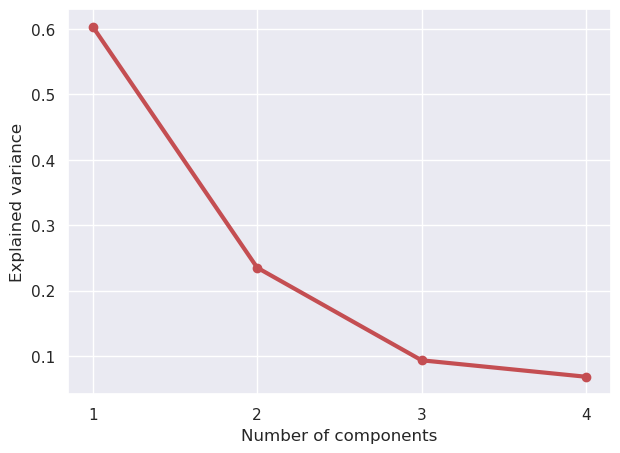

In [29]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

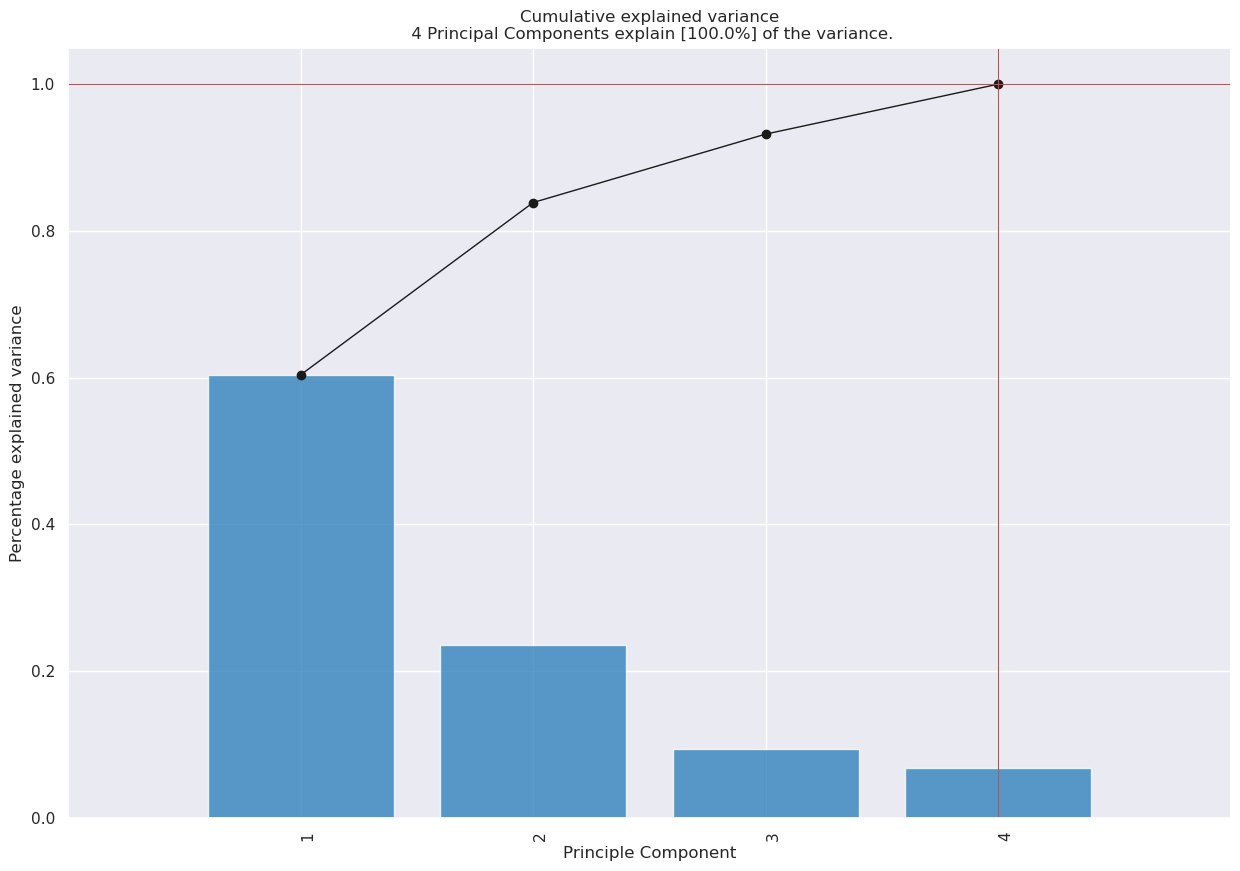

In [30]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 700x500 with 0 Axes>

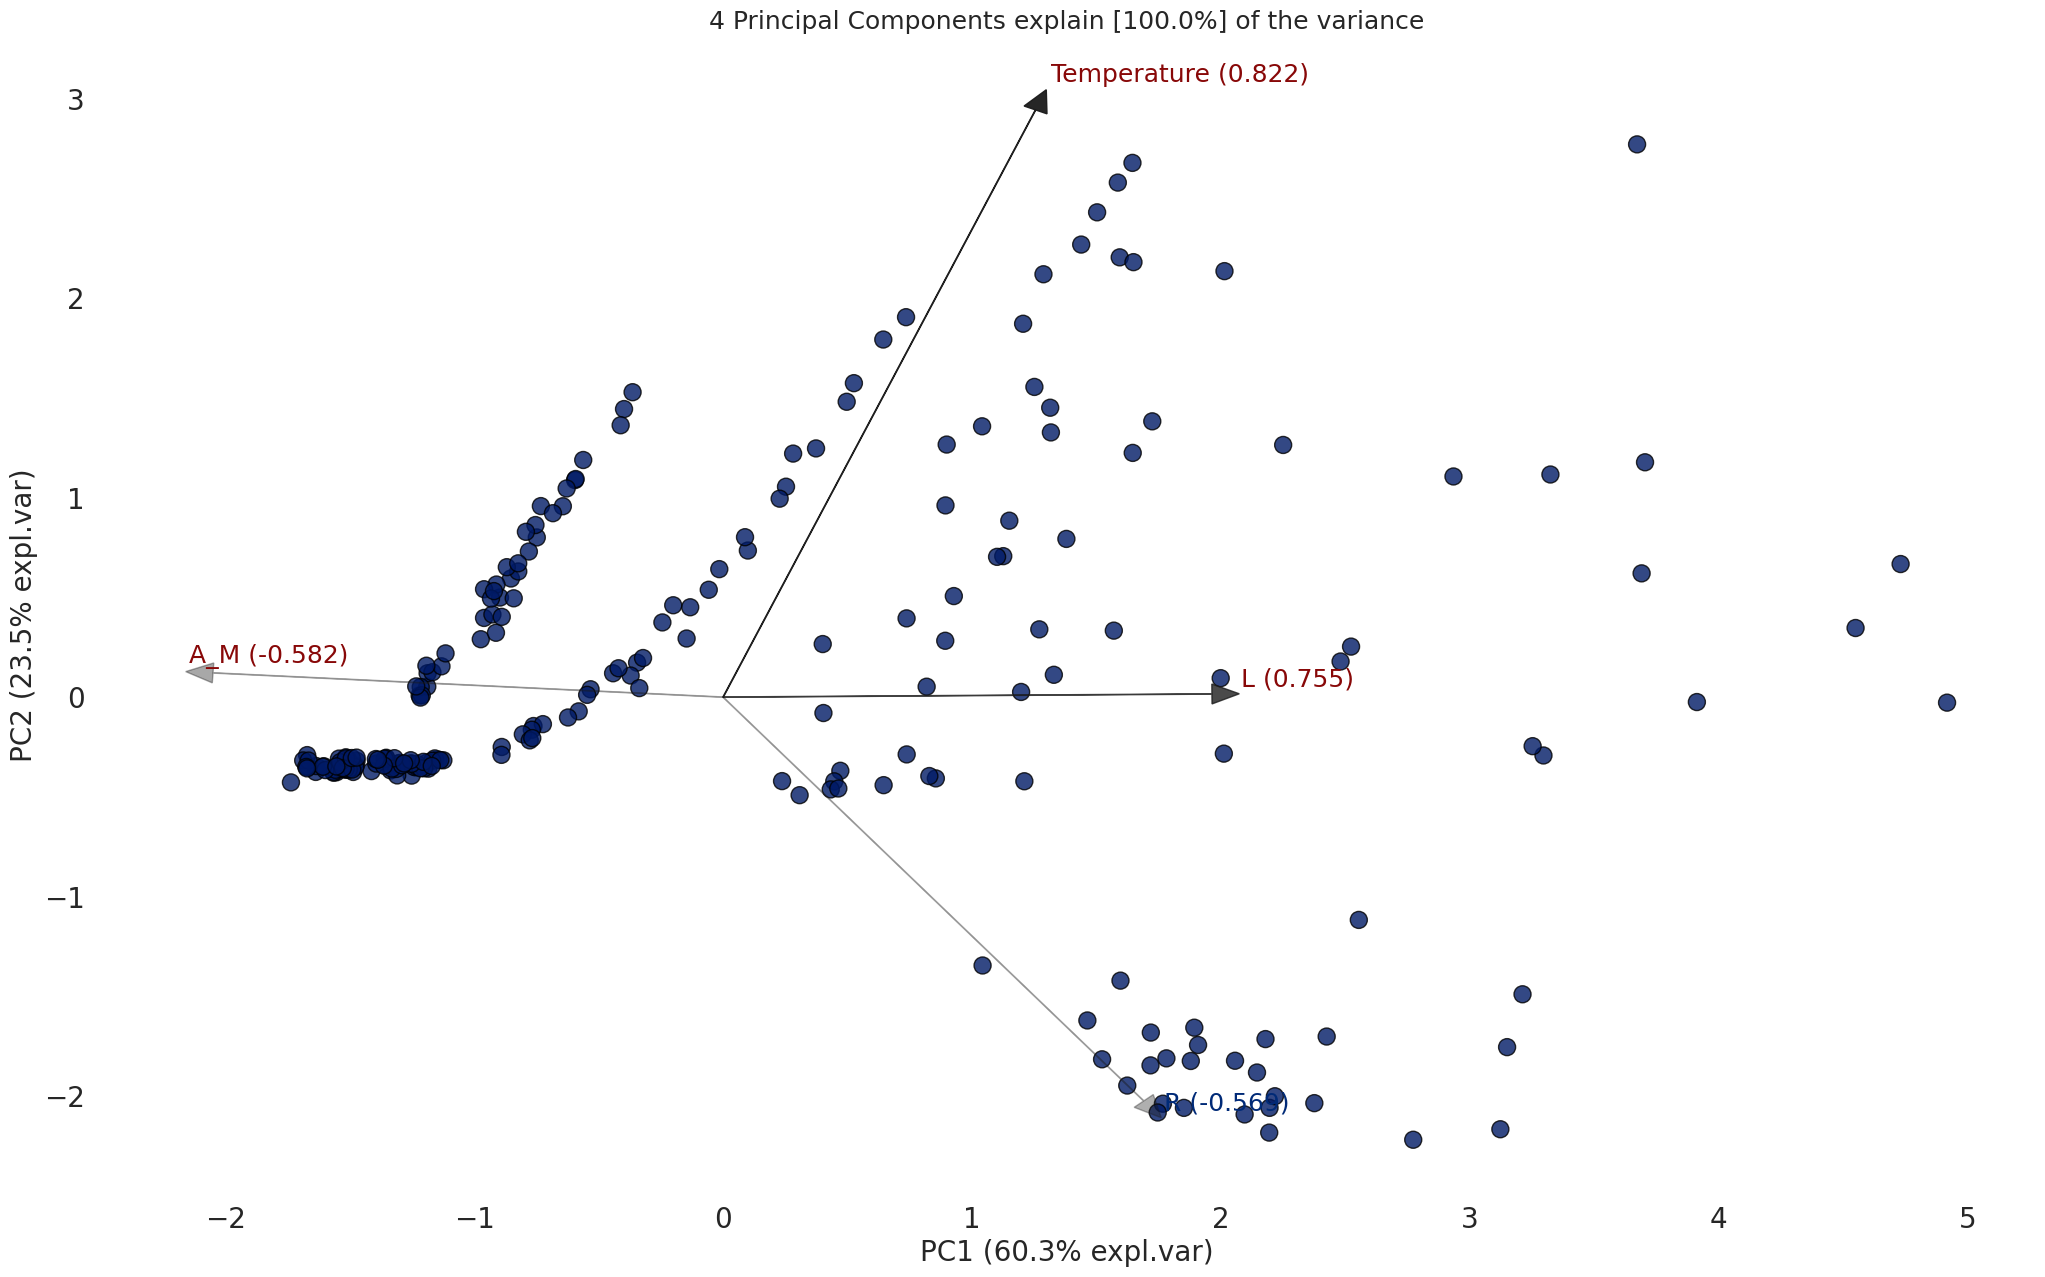

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.3% expl.var)', ylabel='PC2 (23.5% expl.var)'>)

In [31]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


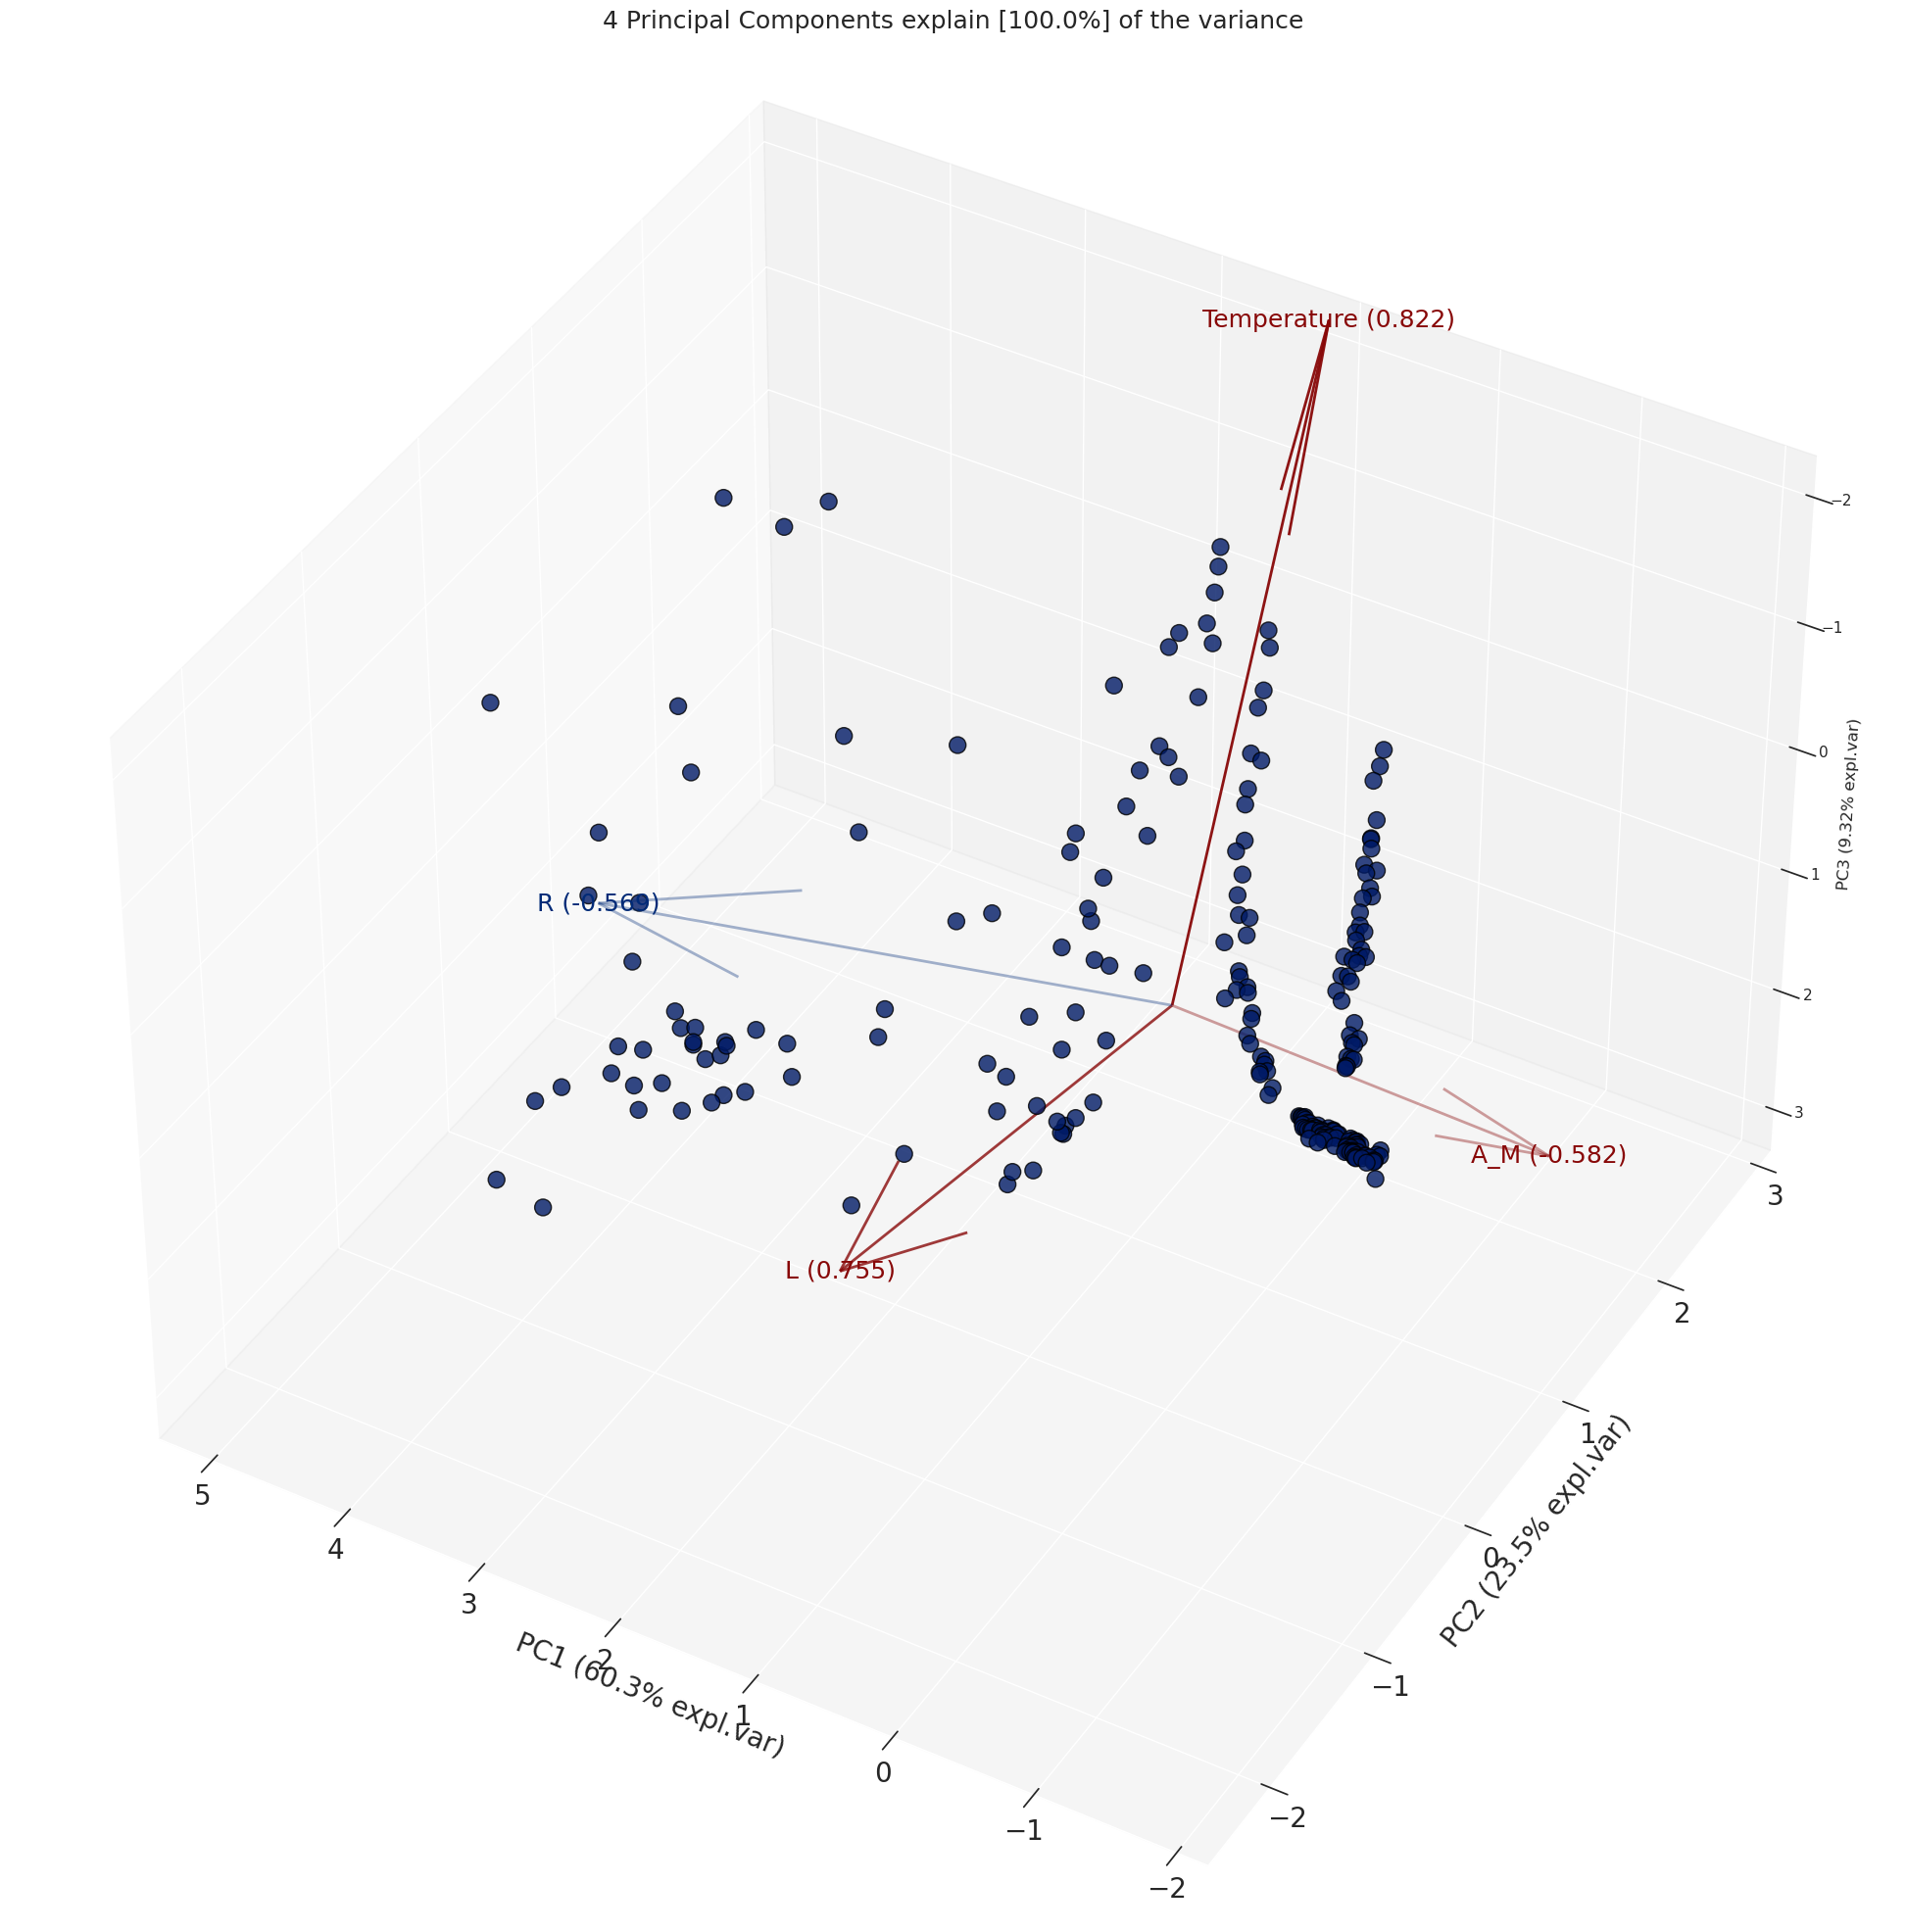

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.3% expl.var)', ylabel='PC2 (23.5% expl.var)'>)

In [32]:
model.biplot3d(legend=False)

In [33]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0.rc8'

In [34]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
# dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (216, 7)
Unseen Data For Predictions: (24, 7)


In [35]:
from pycaret.classification import *
clf = setup(data=data, target='Type', train_size=0.7, session_id=123)

In [36]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [37]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [38]:
ridge = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
tuned_ridge=tune_model(ridge)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [40]:
tuned_ridge

RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, positive=False,
                random_state=123, solver='auto', tol=0.001)

In [41]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_lr

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [50]:
!pip install statsmodels --upgrade

In [51]:
clf_pca = setup(data=data, target='Type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [52]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [53]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [55]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
ridge_pca = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [58]:
tuned_ridge_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=123, solver='auto', tol=0.001)

In [59]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [60]:
nb_pca = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
tuned_nb_pca = tune_model(nb_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
tuned_nb_pca

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
evaluate_model(tuned_nb_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [64]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [65]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [66]:
tuned_lr_pca

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [68]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [70]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [71]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [72]:
!pip install shap

In [73]:
import shap

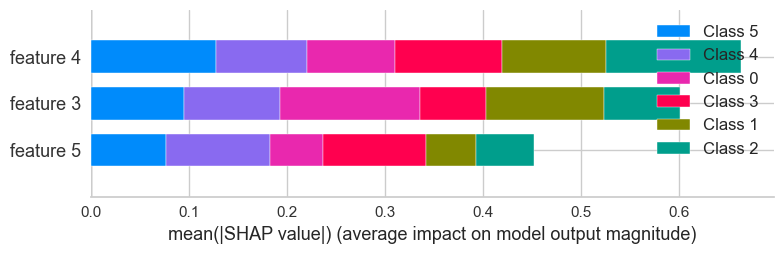

In [74]:
interpret_model(tuned_et_pca, plot='summary')

In [75]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [76]:
interpret_model(tuned_et_pca, plot='reason')